In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report,precision_score, recall_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
df = pd.read_csv("Telecom.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Information

In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The dataframe has only object and interger columns.

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# List of Catcategorical & Numerical columns

In [8]:
numCol=[]
catCol=[]

for col in df.columns:
    if df[col].dtype=='O':
        catCol.append(col)
    else:
            numCol.append(col)

In [9]:
print("List of categorical columns:",catCol)
print("List of numerical columns:",numCol)

List of categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
List of numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']


# Missing Value Analysis of Dataset

In [10]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df[df.isna().sum(axis=1)>1]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


# Check Duplicate,Repeated and Unknown values

In [12]:
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [13]:
for i in catCol:
    print(i,"---%Null", (df[i].shape[0]-df[i].notnull().sum()) / df[i].shape[0]*100)
    print(df[i].value_counts())
    print("\n")

customerID ---%Null 0.0
2088-IEBAU    1
1656-DRSMG    1
9000-PLFUZ    1
6100-QQHEB    1
8853-TZDGH    1
             ..
6504-VBLFL    1
3292-PBZEJ    1
7401-JIXNM    1
1421-HCERK    1
4080-OGPJL    1
Name: customerID, Length: 7043, dtype: int64


gender ---%Null 0.0
Male      3555
Female    3488
Name: gender, dtype: int64


Partner ---%Null 0.0
No     3641
Yes    3402
Name: Partner, dtype: int64


Dependents ---%Null 0.0
No     4933
Yes    2110
Name: Dependents, dtype: int64


PhoneService ---%Null 0.0
Yes    6361
No      682
Name: PhoneService, dtype: int64


MultipleLines ---%Null 0.0
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


InternetService ---%Null 0.0
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


OnlineSecurity ---%Null 0.0
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


OnlineBackup ---%Nu

In [14]:
for i in numCol:
    print(i,"---%Null", (df[i].shape[0]-df[i].notnull().sum()) / df[i].shape[0]*100)
    print(df[i].value_counts())
    print("\n")

SeniorCitizen ---%Null 0.0
0    5901
1    1142
Name: SeniorCitizen, dtype: int64


tenure ---%Null 0.0
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


MonthlyCharges ---%Null 0.0
20.05     61
19.85     45
19.90     44
19.95     44
19.65     43
          ..
87.65      1
35.30      1
114.85     1
56.50      1
97.25      1
Name: MonthlyCharges, Length: 1585, dtype: int64




# Descriptive Statistics

In [15]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,2088-IEBAU,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [16]:
df[numCol].describe

<bound method NDFrame.describe of       SeniorCitizen  tenure  MonthlyCharges
0                 0       1           29.85
1                 0      34           56.95
2                 0       2           53.85
3                 0      45           42.30
4                 0       2           70.70
...             ...     ...             ...
7038              0      24           84.80
7039              0      72          103.20
7040              0      11           29.60
7041              1       4           74.40
7042              0      66          105.65

[7043 rows x 3 columns]>

In [17]:
df[catCol].describe

<bound method NDFrame.describe of       customerID  gender Partner Dependents PhoneService     MultipleLines  \
0     7590-VHVEG  Female     Yes         No           No  No phone service   
1     5575-GNVDE    Male      No         No          Yes                No   
2     3668-QPYBK    Male      No         No          Yes                No   
3     7795-CFOCW    Male      No         No           No  No phone service   
4     9237-HQITU  Female      No         No          Yes                No   
...          ...     ...     ...        ...          ...               ...   
7038  6840-RESVB    Male     Yes        Yes          Yes               Yes   
7039  2234-XADUH  Female     Yes        Yes          Yes               Yes   
7040  4801-JZAZL  Female     Yes        Yes           No  No phone service   
7041  8361-LTMKD    Male     Yes         No          Yes               Yes   
7042  3186-AJIEK    Male      No         No          Yes                No   

     InternetService OnlineSe

In [18]:
df[catCol].describe().T

,count,unique,top,freq
customerID,7043,7043,2088-IEBAU,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


# Univariate Analysis

In [19]:
for i in catCol:
    print(i)
    print(df[i].nunique())
    print(df[i].value_counts())
    print("\n")

customerID
7043
2088-IEBAU    1
1656-DRSMG    1
9000-PLFUZ    1
6100-QQHEB    1
8853-TZDGH    1
             ..
6504-VBLFL    1
3292-PBZEJ    1
7401-JIXNM    1
1421-HCERK    1
4080-OGPJL    1
Name: customerID, Length: 7043, dtype: int64


gender
2
Male      3555
Female    3488
Name: gender, dtype: int64


Partner
2
No     3641
Yes    3402
Name: Partner, dtype: int64


Dependents
2
No     4933
Yes    2110
Name: Dependents, dtype: int64


PhoneService
2
Yes    6361
No      682
Name: PhoneService, dtype: int64


MultipleLines
3
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


InternetService
3
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


OnlineSecurity
3
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


OnlineBackup
3
No                     3088
Yes                    2429
No internet service    1526
Name:

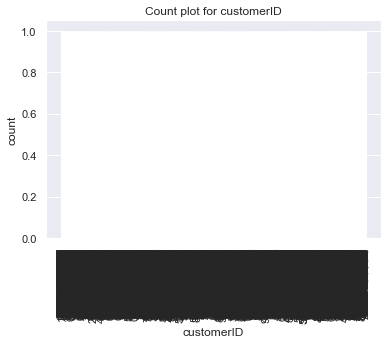

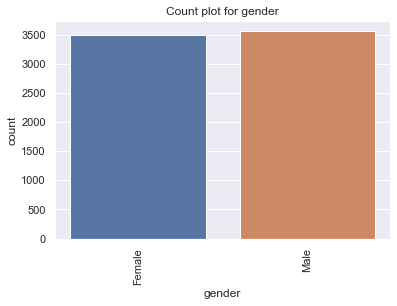

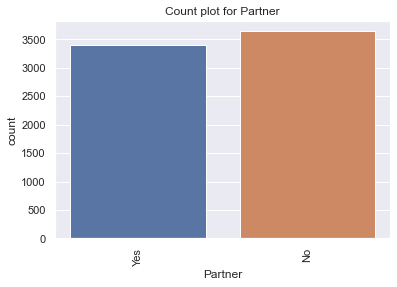

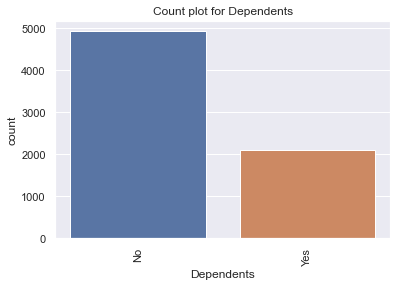

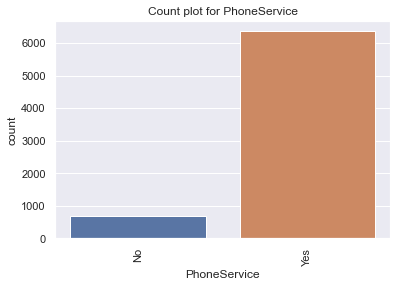

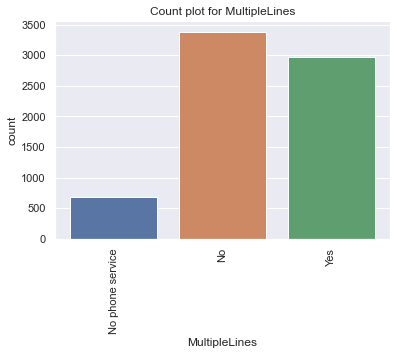

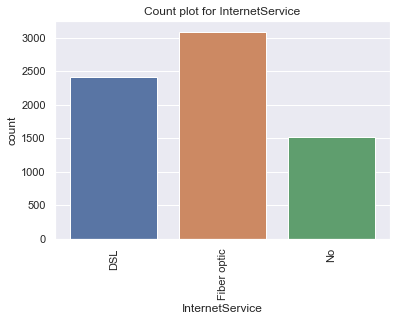

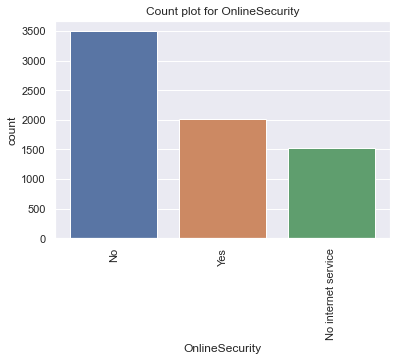

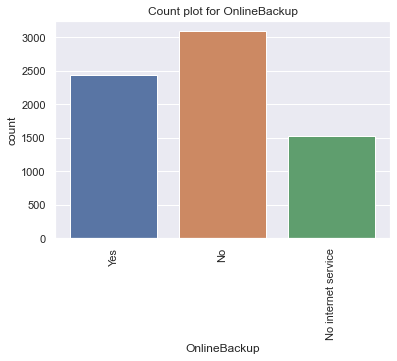

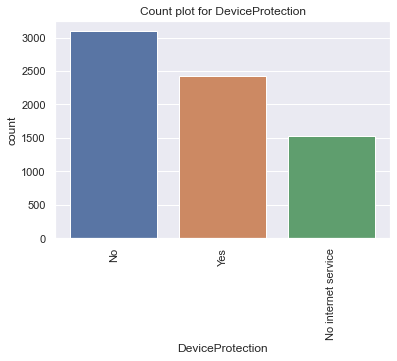

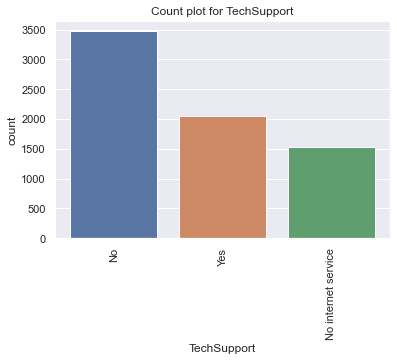

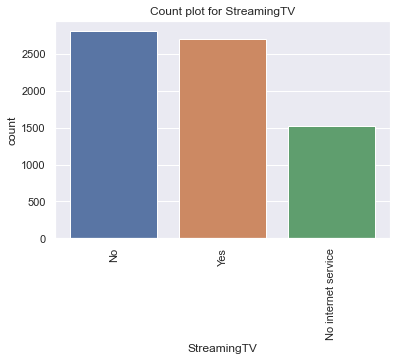

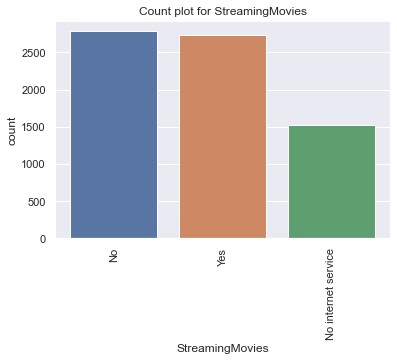

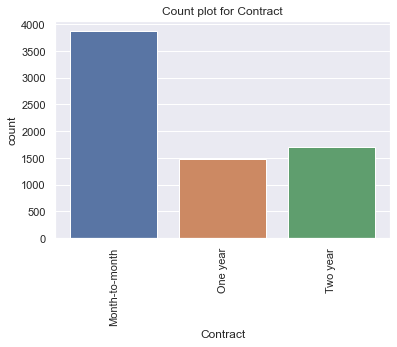

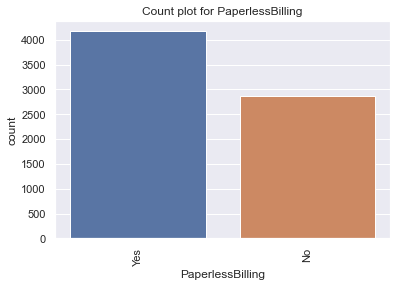

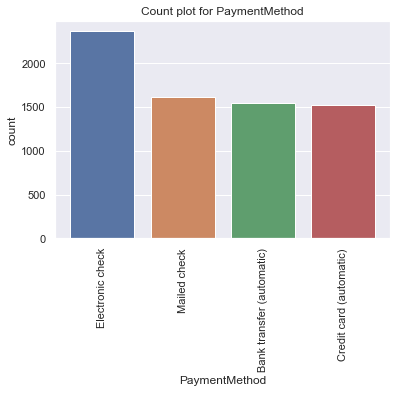

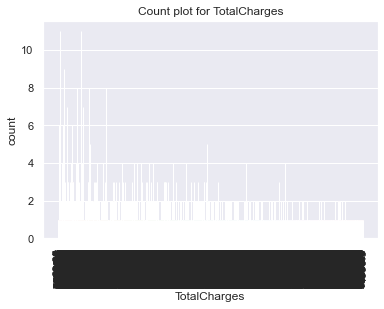

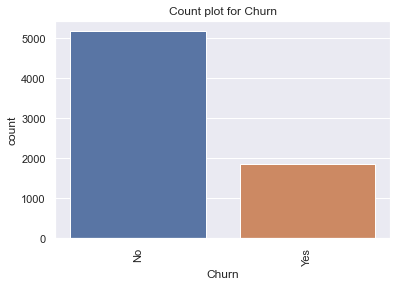

In [20]:
for i in catCol:
    plt.figure()
    sns.set_theme(style="darkgrid")
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    plt.title(f"Count plot for {i}")
    plt.plot()
    plt.show()

In [21]:
for i in numCol:
    print(i)
    print(df[i].nunique())
    print(df[i].value_counts())
    print("\n")

SeniorCitizen
2
0    5901
1    1142
Name: SeniorCitizen, dtype: int64


tenure
73
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


MonthlyCharges
1585
20.05     61
19.85     45
19.90     44
19.95     44
19.65     43
          ..
87.65      1
35.30      1
114.85     1
56.50      1
97.25      1
Name: MonthlyCharges, Length: 1585, dtype: int64




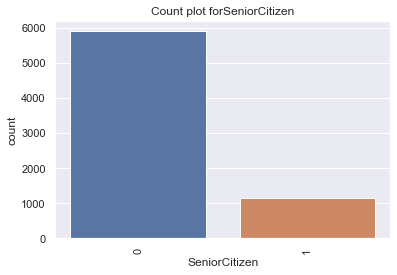

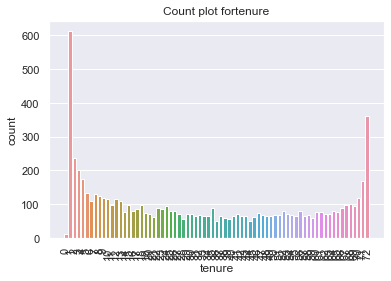

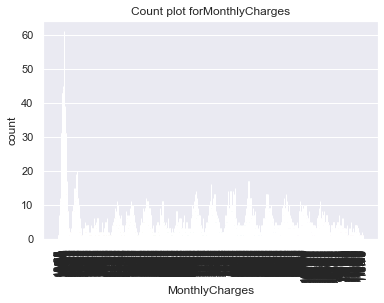

In [22]:
for i in numCol:
    plt.figure()
    sns.set_theme(style="darkgrid")
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    plt.title(f"Count plot for{i}")
    plt.plot()
    plt.show()

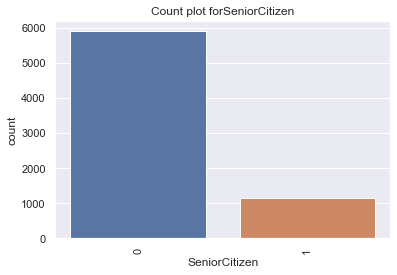

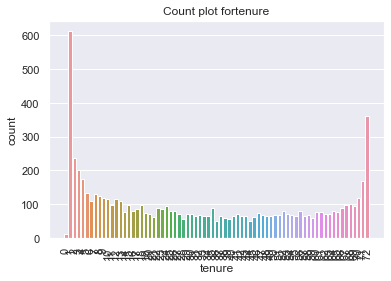

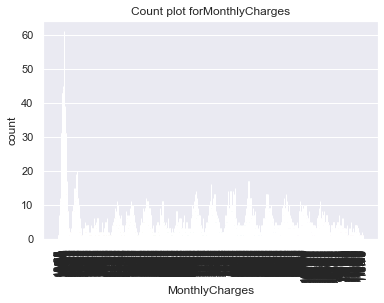

In [23]:
for i in numCol:
    plt.figure()
    sns.set_theme(style="darkgrid")
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    plt.title(f"Count plot for{i}")
    plt.plot()
    plt.show()

In [24]:
pd.DataFrame(df.skew(axis=0,skipna=True))

,0
SeniorCitizen,1.833633
tenure,0.239540
MonthlyCharges,-0.220524


# Multivariate Analysis

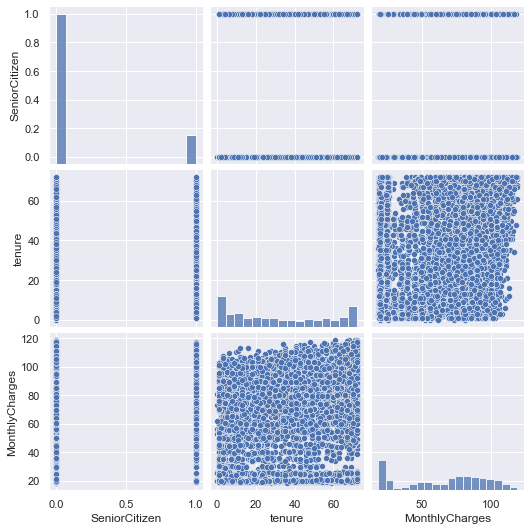

In [25]:
sns.pairplot(df)
plt.plot()
plt.show()

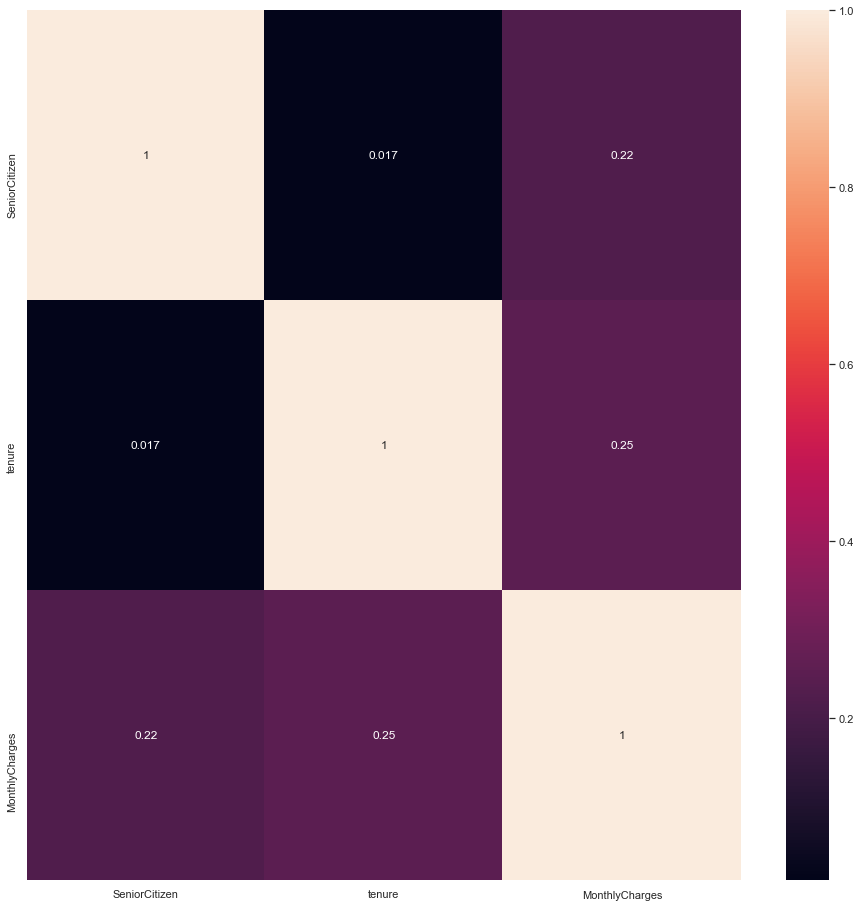

In [26]:
plt.figure(figsize= (16,16))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Data Scaling

In [27]:
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mode = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [28]:
df_num=pd.DataFrame(imp_median.fit_transform(df[numCol]), columns=numCol)
df_cat=pd.DataFrame(imp_mode.fit_transform(df[catCol]),columns=catCol)

In [29]:
df=pd.concat([df_num,df_cat],axis=1)

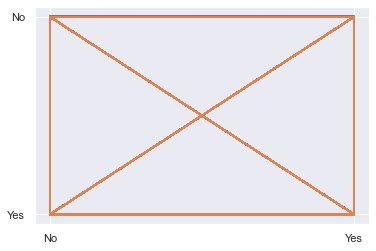

In [30]:
plt.plot(df["Churn"],df["Partner"],label="Line1",linestyle="-.")
plt.plot(df["Churn"],df["SeniorCitizen"],label="Line2",linestyle=":")
plt.plot();

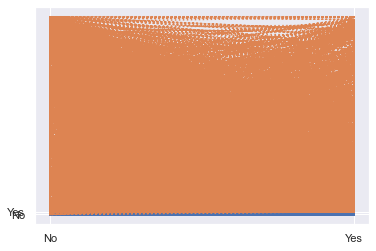

In [31]:
plt.plot(df["Churn"],df["Dependents"],label="Line1",linestyle="-.")
plt.plot(df["Churn"],df["tenure"],label="Line2",linestyle=":")
plt.plot();

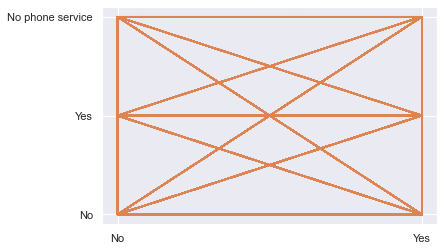

In [32]:
plt.plot(df["Churn"],df["PhoneService"],label="Line1",linestyle="-.")
plt.plot(df["Churn"],df["MultipleLines"],label="Line2",linestyle=":")
plt.plot();

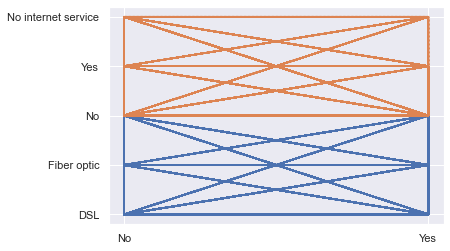

In [33]:
plt.plot(df["Churn"],df["InternetService"],label="Line1",linestyle="-.")
plt.plot(df["Churn"],df["OnlineSecurity"],label="Line2",linestyle=":")
plt.plot();

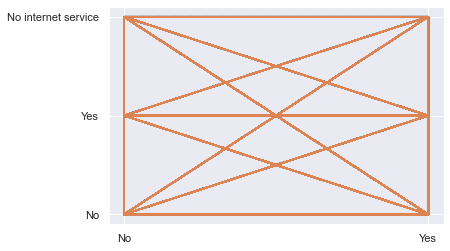

In [34]:
plt.plot(df["Churn"],df["DeviceProtection"],label="Line1",linestyle="-.")
plt.plot(df["Churn"],df["TechSupport"],label="Line2",linestyle=":")
plt.plot();

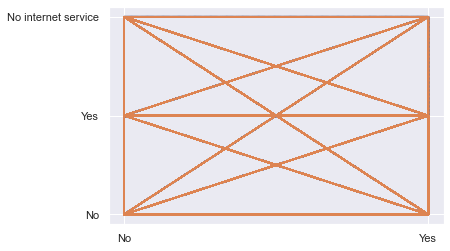

In [35]:
plt.plot(df["Churn"],df["StreamingTV"],label="Line1",linestyle="-.")
plt.plot(df["Churn"],df["StreamingMovies"],label="Line2",linestyle=":")
plt.plot();

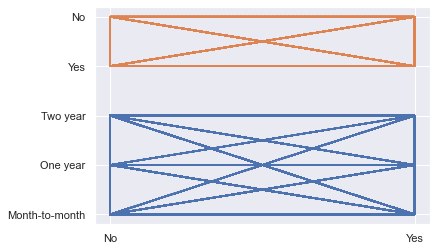

In [36]:
plt.plot(df["Churn"],df["Contract"],label="Line1",linestyle="-.")
plt.plot(df["Churn"],df["PaperlessBilling"],label="Line2",linestyle=":")
plt.plot();

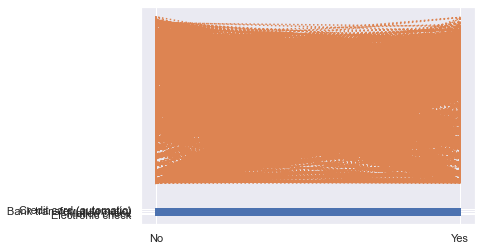

In [37]:
plt.plot(df["Churn"],df["PaymentMethod"],label="Line1",linestyle="-.")
plt.plot(df["Churn"],df["MonthlyCharges"],label="Line2",linestyle=":")
plt.plot();

# Matplotlib-Pandas

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
df=pd.read_csv("Telecom.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


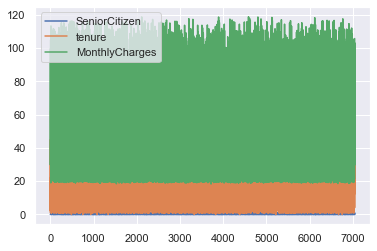

In [40]:
df = pd.read_csv('Telecom.csv')

df.plot()

plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


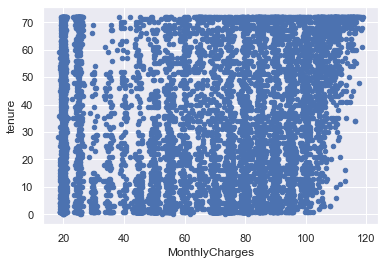

In [41]:
df = pd.read_csv('Telecom.csv')

df.plot(kind = 'scatter', x = 'MonthlyCharges', y = 'tenure')

plt.show() 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


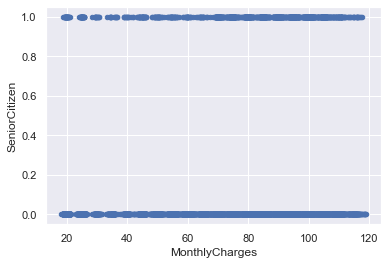

In [42]:
df = pd.read_csv('Telecom.csv')

df.plot(kind = 'scatter', x = 'MonthlyCharges', y = 'SeniorCitizen')

plt.show()

<AxesSubplot:ylabel='Frequency'>

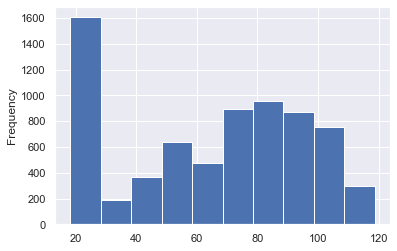

In [43]:
df["MonthlyCharges"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

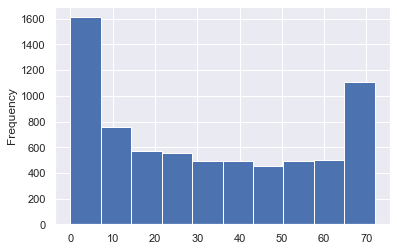

In [44]:
df["tenure"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

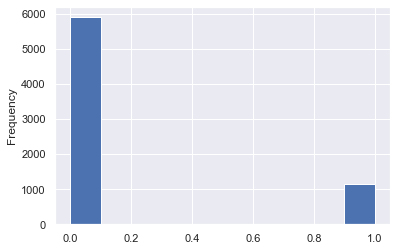

In [45]:
df["SeniorCitizen"].plot(kind = 'hist')

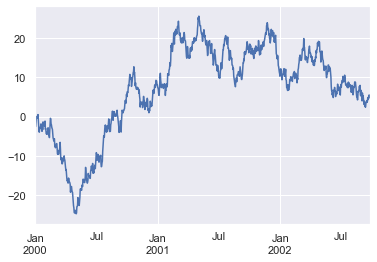

In [46]:
ts = pd.Series(np.random.randn(1000), index = pd.date_range(
                                '1/1/2000', periods = 1000))
ts = ts.cumsum()
ts.plot()
 
plt.show()

<Figure size 432x288 with 0 Axes>

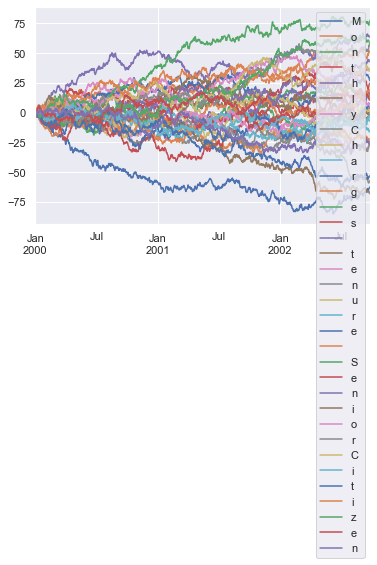

In [47]:
ts = pd.Series(np.random.randn(1000), index = pd.date_range(
                                '1/1/2000', periods = 1000))
 
df = pd.DataFrame(np.random.randn(1000, 35),
   index = ts.index, columns = list('MonthlyCharges tenure SeniorCitizen'))
 
df = df.cumsum()
plt.figure()
df.plot()
plt.show()

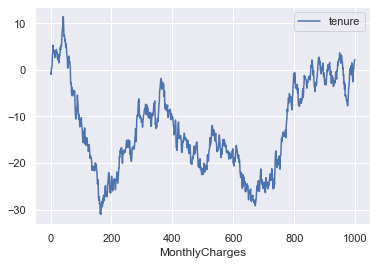

In [48]:
ts = pd.Series(np.random.randn(1000), index = pd.date_range(
                                '1/1/2000', periods = 1000))
 
df = pd.DataFrame(np.random.randn(1000, 14), index = ts.index,
                                      columns = list('MonthlyCharges'))
 
df3 = pd.DataFrame(np.random.randn(1000, 2),
               columns =['tenure', 'SeniorCitizen']).cumsum()
 
df3['MonthlyCharges'] = pd.Series(list(range(len(df))))
df3.plot(x ='MonthlyCharges', y ='tenure')
plt.show()

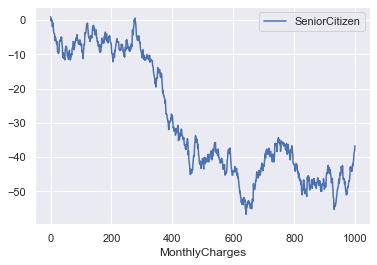

In [49]:
ts = pd.Series(np.random.randn(1000), index = pd.date_range(
                                '1/1/2000', periods = 1000))
 
df = pd.DataFrame(np.random.randn(1000, 14), index = ts.index,
                                      columns = list('MonthlyCharges'))
 
df3 = pd.DataFrame(np.random.randn(1000, 2),
               columns =['tenure', 'SeniorCitizen']).cumsum()
 
df3['MonthlyCharges'] = pd.Series(list(range(len(df))))
df3.plot(x ='MonthlyCharges', y ='SeniorCitizen')
plt.show()

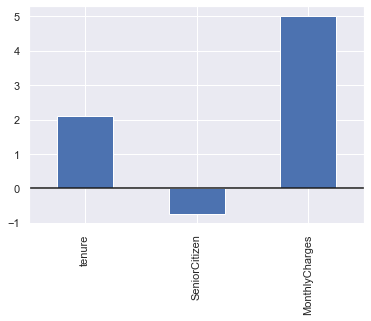

In [50]:
ts = pd.Series(np.random.randn(1000), index = pd.date_range(
                                '1/1/2000', periods = 1000))
 
df = pd.DataFrame(np.random.randn(1000, 14), index = ts.index,
                                      columns = list('MonthlyCharges'))
 
df3 = pd.DataFrame(np.random.randn(1000, 2),
               columns =['tenure', 'SeniorCitizen']).cumsum()
 
df3['MonthlyCharges'] = pd.Series(list(range(len(df))))
df3.iloc[5].plot.bar()
plt.axhline(0, color ='k')
 
plt.show()

<Figure size 432x288 with 0 Axes>

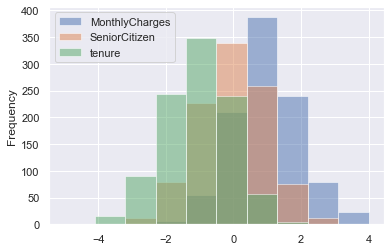

In [51]:
df4 = pd.DataFrame({'MonthlyCharges': np.random.randn(1000) + 1,
                    'SeniorCitizen': np.random.randn(1000),
                    'tenure': np.random.randn(1000) - 1},
                           columns =['MonthlyCharges', 'SeniorCitizen', 'tenure'])
plt.figure()
 
df4.plot.hist(alpha = 0.5)
plt.show()

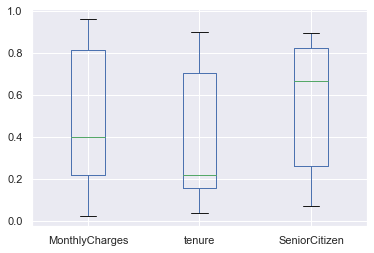

In [52]:
df = pd.DataFrame(np.random.rand(10, 3),
      columns =['MonthlyCharges', 'tenure', 'SeniorCitizen'])
 
df.plot.box()
plt.show()

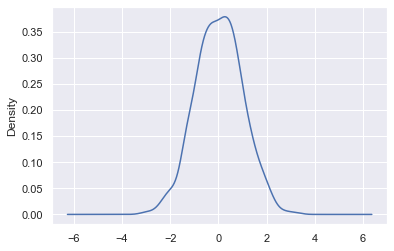

In [53]:
#Density Plot
df = pd.DataFrame(np.random.rand(10, 3),
      columns =['MonthlyCharges', 'tenure', 'SeniorCitizen'])
 
ser = pd.Series(np.random.randn(1000))
ser.plot.kde()
 
plt.show()

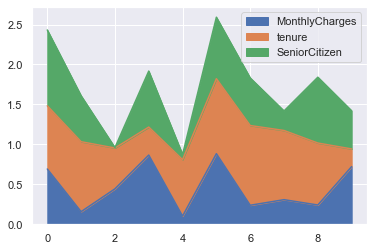

In [54]:
#Area plot using matplotlib
df = pd.DataFrame(np.random.rand(10, 3),
       columns =['MonthlyCharges', 'tenure', 'SeniorCitizen'])
 
df.plot.area()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


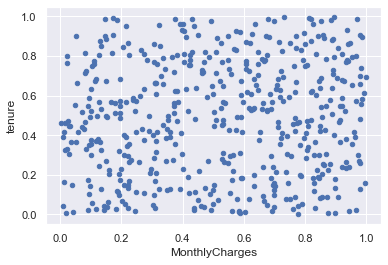

In [55]:
#Scatter plot
df = pd.DataFrame(np.random.rand(500, 3),
           columns =['MonthlyCharges', 'tenure', 'SeniorCitizen'])
 
df.plot.scatter(x ='MonthlyCharges', y ='tenure')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


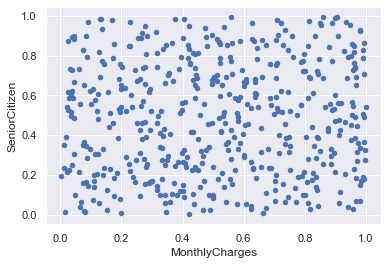

In [56]:
#Scatter plot
df = pd.DataFrame(np.random.rand(500, 3),
           columns =['MonthlyCharges', 'tenure', 'SeniorCitizen'])
 
df.plot.scatter(x ='MonthlyCharges', y ='SeniorCitizen')
plt.show()

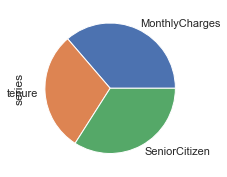

In [57]:
series = pd.Series(3 * np.random.rand(3),
  index =['MonthlyCharges', 'tenure', 'SeniorCitizen'], name ='series')
 
series.plot.pie(figsize =(3, 3))
plt.show()

# Heatmap of Dataset

<AxesSubplot:>

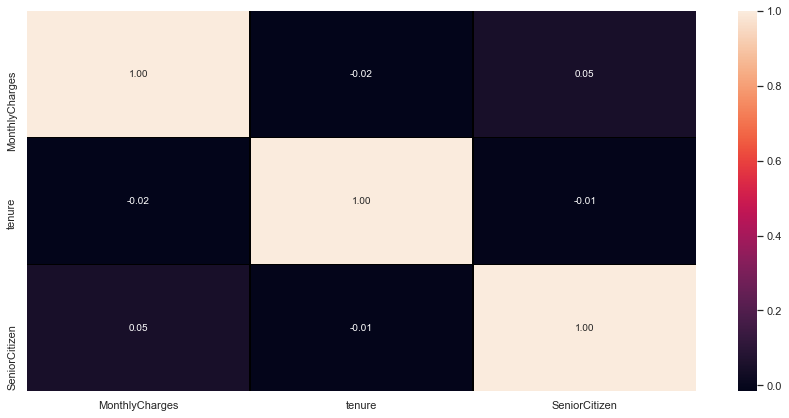

In [58]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt='.2f')

In [59]:
df.describe()

,MonthlyCharges,tenure,SeniorCitizen
count,500.000000,500.000000,500.000000
mean,0.513966,0.492646,0.486897
std,0.291179,0.283418,0.278213
min,0.002936,0.001508,0.000810
25%,0.275929,0.253199,0.237759
50%,0.515090,0.493616,0.493656
75%,0.758824,0.725897,0.723863
max,0.999512,0.999776,0.996355


In [60]:
df.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of      MonthlyCharges    tenure  SeniorCitizen
0          0.518353  0.292525       0.868292
1          0.045259  0.667086       0.484657
2          0.472481  0.394586       0.941784
3          0.059986  0.899059       0.213407
4          0.245140  0.153724       0.729039
..              ...       ...            ...
495        0.390325  0.049655       0.510997
496        0.317534  0.136220       0.741777
497        0.317295  0.311485       0.460028
498        0.824798  0.716690       0.173055
499        0.159872  0.510691       0.440965

[500 rows x 3 columns]>

# Data Mining & Exploration

In [61]:
# Loading the CSV with pandas
data = pd.read_csv('Telecom.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [62]:
data.shape

(7043, 21)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [64]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [65]:
#Removing customer IDs from the data set the columns not used in the predictive model.
df = data.drop("customerID", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


The dataset has a lot of categorical variables rendered as text values (‘Yes’,’No’,etc.) in the columns. Converting the categorical values into numeric values to facilitate ML algorithms to process the data.Also, converting Total Charges to a numerical data type.

In [66]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

From the above output, it can be seen that, there are 11 missing values for Total Charges. Replacing 11 rows from the data set. Also predictor variable here is Churn. Therefore, it is necessary to convert the predictor variable in binary numeric variable.

In [67]:
df.dropna(inplace = True)

df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

# converting all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [68]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7032 non-null   int64  
 5   gender_Female                            7032 non-null   uint8  
 6   gender_Male                              7032 non-null   uint8  
 7   Partner_No                               7032 non-null   uint8  
 8   Partner_Yes                              7032 non-null   uint8  
 9   Dependents_No                            7032 non-null   uint8  
 10  Dependents_Yes                           7032 no


Correlations between customer data features and customer churn.
Examining the correlation between churn and each customer feature to decide which features of the data to include in the predictive churn model.


<AxesSubplot:>

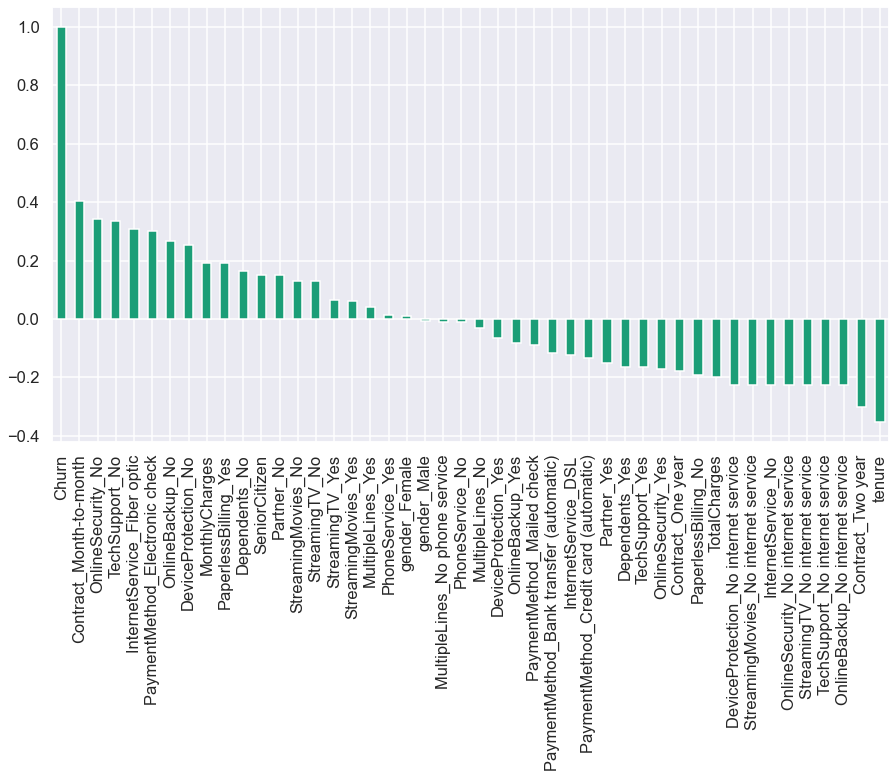

In [69]:
# Checking again Correlation of "Churn" with other variables on a different plot
sns.set(style='darkgrid', context='talk', palette='Dark2')
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')



It can be seen from above correlation plot that, Contract_Month-to-month, Online security_No, Tech Support_No...etc. are positively correlated with Churn. While, on the other end of the plot, tenure, Contract_Two year, InternetService_No...etc. are negatively correlated with Churn.

Interestingly, services such as Online security, StreamingTV, OnlineBackup, TechSupport..., etc. with InternetService_No seem to be negatively related to Churn. Need to explore the patterns more for the above correlations below before modelling and identifying the important variables.


In [70]:
df_dummies.corr()  # reporting correlation matrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,0.150541,0.001819,-0.001819,-0.016957,0.016957,0.210550,...,0.119842,0.137752,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987
tenure,0.015683,1.000000,0.246862,0.825880,-0.354049,-0.005285,0.005285,-0.381912,0.381912,-0.163386,...,0.285402,-0.649346,0.202338,0.563801,-0.004823,0.004823,0.243822,0.232800,-0.210197,-0.232181
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.192858,0.013779,-0.013779,-0.097825,0.097825,0.112343,...,0.627235,0.058933,0.004810,-0.073256,-0.351930,0.351930,0.042410,0.030055,0.271117,-0.376568
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484,-0.000048,0.000048,-0.319072,0.319072,-0.064653,...,0.519867,-0.446776,0.170569,0.358036,-0.157830,0.157830,0.186119,0.182663,-0.060436,-0.294708
Churn,0.150541,-0.354049,0.192858,-0.199484,1.000000,0.008545,-0.008545,0.149982,-0.149982,0.163128,...,0.060860,0.404565,-0.178225,-0.301552,-0.191454,0.191454,-0.118136,-0.134687,0.301455,-0.090773
gender_Female,0.001819,-0.005285,0.013779,-0.000048,0.008545,1.000000,-1.000000,-0.001379,0.001379,0.010349,...,0.010105,0.003251,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199
gender_Male,-0.001819,0.005285,-0.013779,0.000048,-0.008545,-1.000000,1.000000,0.001379,-0.001379,-0.010349,...,-0.010105,-0.003251,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199
Partner_No,-0.016957,-0.381912,-0.097825,-0.319072,0.149982,-0.001379,0.001379,1.000000,-1.000000,0.452269,...,-0.118108,0.280202,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948
Partner_Yes,0.016957,0.381912,0.097825,0.319072,-0.149982,0.001379,-0.001379,-1.000000,1.000000,-0.452269,...,0.118108,-0.280202,0.083067,0.247334,0.013957,-0.013957,0.111406,0.082327,-0.083207,-0.096948
Dependents_No,0.210550,-0.163386,0.112343,-0.064653,0.163128,0.010349,-0.010349,0.452269,-0.452269,1.000000,...,0.038375,0.229715,-0.069222,-0.201699,-0.110131,0.110131,-0.052369,-0.061134,0.149274,-0.056448


# Data exploration and Visualisation

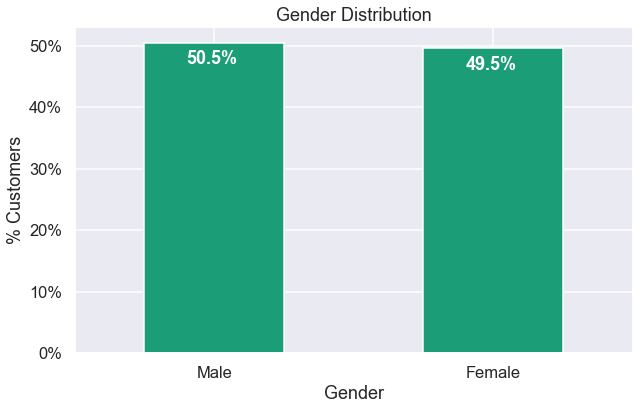

In [71]:
from pylab import rcParams
import matplotlib.ticker as mtick # For specifying the axes tick format 
rcParams['figure.figsize']=10,6

ax = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True, rot = 0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

totals = []  # creating a list to collect the plt.patches data

# finding the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)  # setting individual bar lables using above list

for i in ax.patches:
    # getting_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%', color='white', weight = 'bold')

Text(0.5, 1.0, '% of Senior Citizens')

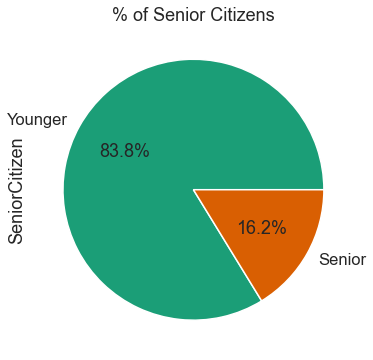

In [72]:
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Younger', 'Senior'])                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('% of Senior Citizens')

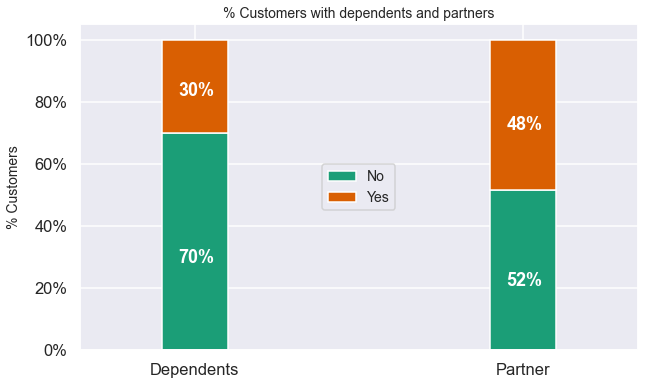

In [73]:
df = pd.melt(data, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df1 = df.groupby(['variable','value']).count().unstack()
df1 = df1*100/len(data)
ax = df1.loc[:,'customerID'].plot.bar(stacked=True, figsize=(10,6),rot = 0,width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold')

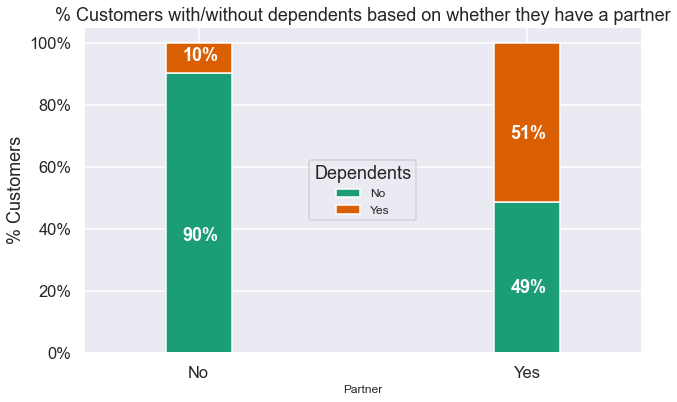

In [74]:
partner_dependents = data.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':12},title = 'Dependents')
ax.set_ylabel('% Customers')
ax.set_title('% Customers with/without dependents based on whether they have a partner')
ax.xaxis.label.set_size(12)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold')

Text(0.5, 1.0, 'Number of Customers by tenure')

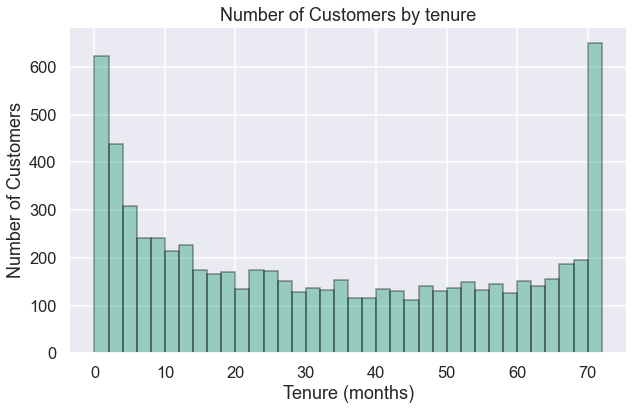

In [75]:
ax = sns.distplot(data['tenure'], hist=True, kde=False, 
             bins=int(180/5), 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Number of Customers by tenure')

Text(0.5, 1.0, 'Number of Customers by Contract Type')

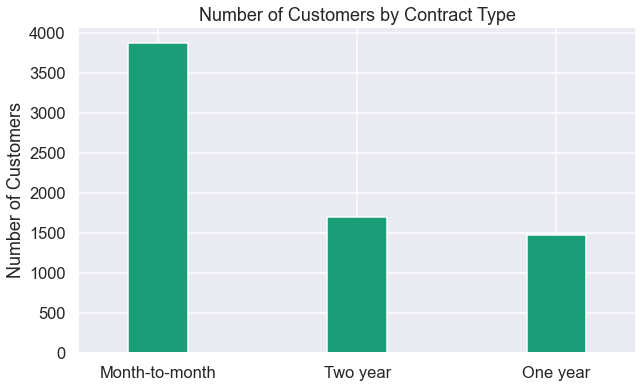

In [76]:
ax = data['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers by Contract Type')

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

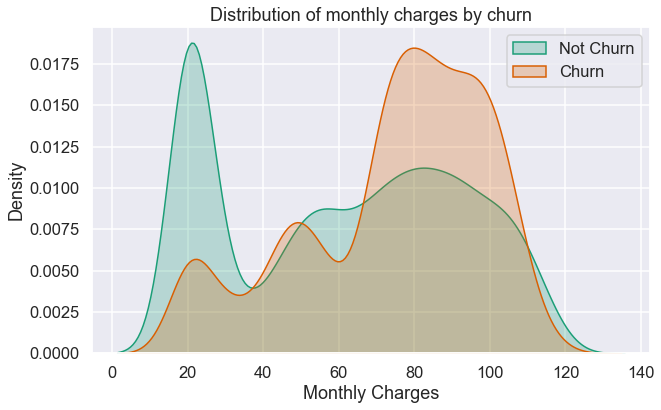

In [77]:
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No')], shade=True)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ], ax =ax, shade= True)
ax.legend(["Not Churn","Churn"], loc='best')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

# Predictive modelling

In [78]:
df_dummies = df_dummies.drop("TotalCharges", axis=1) # removing Total Charges to avoid multicolinearity.

# Using the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)
print('length of X_train and x_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

length of X_train and x_test:  5625 1407
length of y_train and y_test:  5625 1407


In [80]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics

model = LogisticRegression(solver='lbfgs', max_iter=1000)
result = model.fit(X_train, y_train)

prediction_test = model.predict(X_test)
y_pred = prediction_test #prediction

# Print the prediction accuracy
print ("Prdiction:",metrics.accuracy_score(y_test, y_pred))

# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Prdiction: 0.8017057569296375
Precision: 0.6655052264808362
Recall: 0.5106951871657754


In [81]:
print('Intercept: ' + str(result.intercept_)) # reporting the intercept
print('Regression: ' + str(result.coef_)) # reporting the co-efficients

Intercept: [-0.98796453]
Regression: [[ 0.18715203 -2.43931051 -0.00852663  0.01488481 -0.01485236  0.01063183
  -0.01059938  0.11062872 -0.11059627  0.11728073 -0.11724828 -0.17017432
   0.11728073  0.05292604 -0.45958971  0.56526352 -0.10564136  0.22501643
  -0.10564136 -0.11934262  0.11825689 -0.10564136 -0.01258308  0.04802402
  -0.10564136  0.05764979  0.2254066  -0.10564136 -0.11973279 -0.08884815
  -0.10564136  0.19452196 -0.08917765 -0.10564136  0.19485147  0.6214897
  -0.04373557 -0.57772168 -0.15446256  0.15449501 -0.03627493 -0.15979595
   0.24576997 -0.04966664]]


Confusion matrix
[[937  96]
 [183 191]]


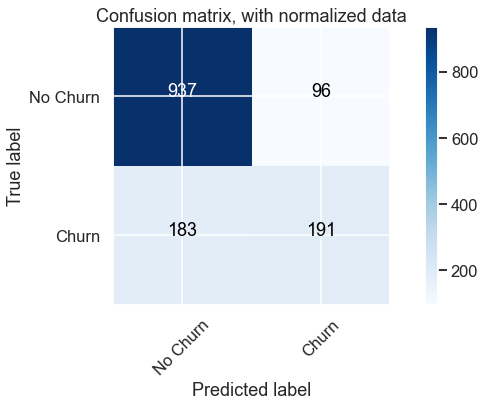

In [82]:
import itertools

#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize = False, cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, prediction_test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Churn','Churn'],
                      title='Confusion matrix, with normalized data')

In [83]:
#F1 Score
f1 = (2*0.6577181208053692*0.5521126760563381)/(0.6577181208053692 + 0.5521126760563381)
print("F1 Score {:0.2f}".format(f1))

F1 Score 0.60


In [84]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],index=X.columns.values)
weights.sort_values(ascending = False)

Contract_Month-to-month                    0.621490
InternetService_Fiber optic                0.565264
PaymentMethod_Electronic check             0.245770
TechSupport_No                             0.225407
OnlineSecurity_No                          0.225016
StreamingMovies_Yes                        0.194851
StreamingTV_Yes                            0.194522
SeniorCitizen                              0.187152
PaperlessBilling_Yes                       0.154495
OnlineBackup_No                            0.118257
PhoneService_No                            0.117281
MultipleLines_No phone service             0.117281
Dependents_No                              0.110629
DeviceProtection_Yes                       0.057650
MultipleLines_Yes                          0.052926
DeviceProtection_No                        0.048024
gender_Female                              0.014885
Partner_No                                 0.010632
MonthlyCharges                            -0.008527
Partner_Yes 

In [85]:
!pip install scikit-plot
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

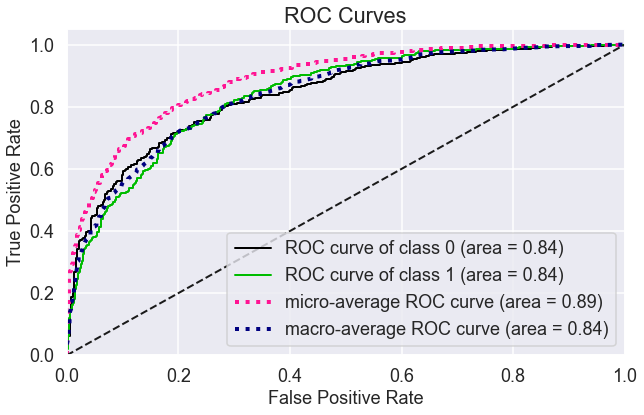

In [86]:
import scikitplot as skplt
y_pred_proba = model.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)